In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GET DATASETS

df_features = pd.read_csv('csv/Features.csv')
df_streams = pd.read_csv('csv/Streams.csv')

In [3]:
# CONCAT DATASETS

df_final=pd.concat([df_features,df_streams],axis=1,join='inner')

# DROP USELESS COLUMNS
# df_final=df_final.drop(columns=["Release Date","name","id","Artist"]).set_index("Song")
df_final=df_final.drop(columns=["Release Date","name","id","Artist","duration","Streams (Billions)"]).set_index("Song")
df_final

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
Song,,,,,,,,,,,
Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585
...,...,...,...,...,...,...,...,...,...,...,...
7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765
Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429
Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548


In [4]:
# Preprocessing the data, normalisation
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(df_final)
scaled_data.shape

(100, 11)

In [5]:
# Hierarchical Clustering:
# 1. Compute distance matrix
# 2. Merge closest clusters
# 3. update distance matrix
# repeat until only 1 cluster

from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(
    scaled_data, method="complete", metric="euclidean") # farthest 
average_clustering = linkage(scaled_data, method="average", metric="euclidean") # average
single_clustering = linkage(scaled_data, method="single", metric="euclidean") # closest
ward_clustering = linkage(scaled_data, method="ward", metric="euclidean") # variance

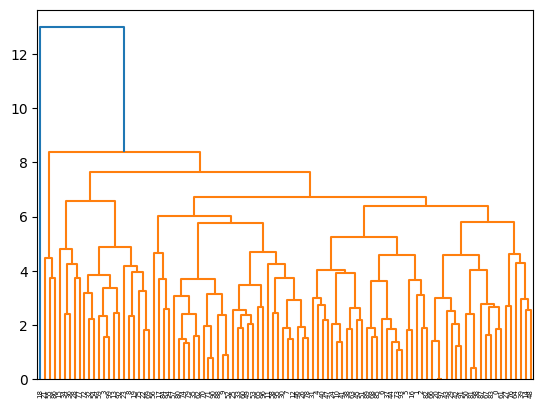

In [6]:
# A dendogram is a graph that represent the distance beetwen clusters
# We find the optimal number of cluster by finding the highest vertical line
# and the number of intersection is the number of clusters
dendrogram(complete_clustering)
plt.show()

<AxesSubplot: xlabel='Cluster', ylabel='danceability'>

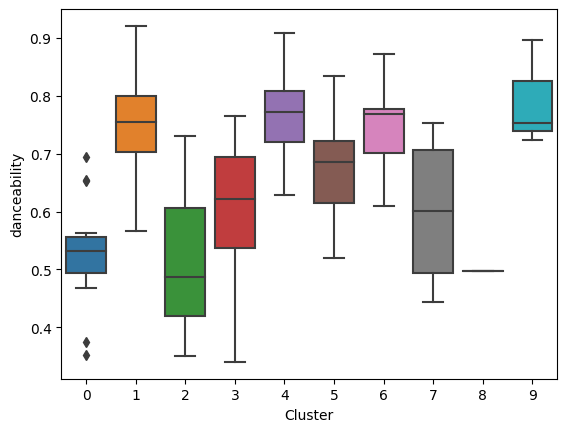

In [7]:
from scipy.cluster.hierarchy import cut_tree

cluster_labels = cut_tree(complete_clustering, n_clusters=10).reshape(-1, )
df_final["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='danceability', data=df_final)

In [8]:
df_final=df_final.reset_index()
df_final

,Song,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Cluster
0,Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,0
1,Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,1
2,Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,1
3,Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,2
4,Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,3
96,Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,3
97,Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,0
98,Despacito,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655,0


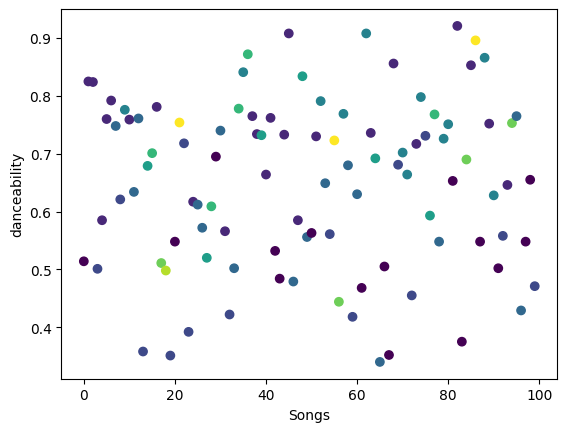

In [9]:
plt.scatter(df_final.index, df_final['danceability'], c=df_final['Cluster'], cmap='viridis')
plt.xlabel('Songs')
plt.ylabel('danceability')
plt.show()

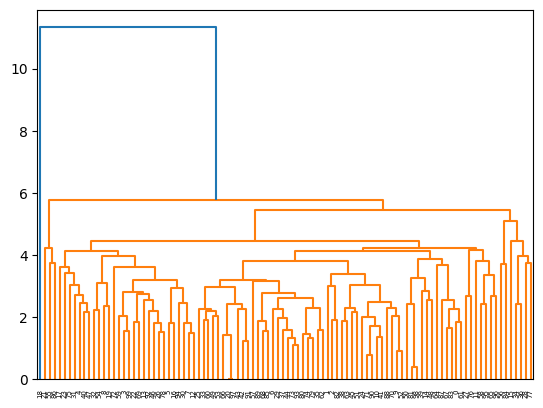

In [10]:
dendrogram(average_clustering)
plt.show()

<AxesSubplot: xlabel='Cluster', ylabel='liveness'>

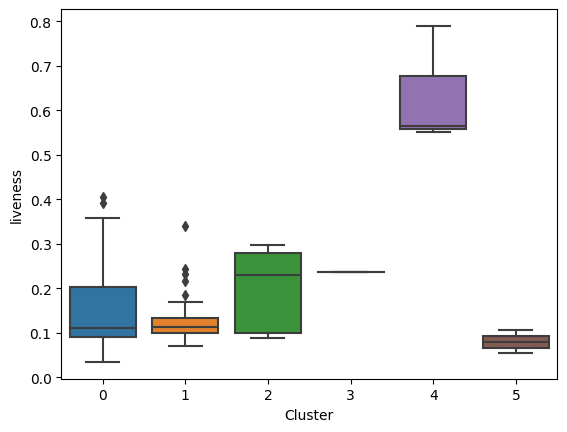

In [11]:
cluster_labels = cut_tree(average_clustering, n_clusters=6).reshape(-1, )
df_final["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='liveness', data=df_final)

In [12]:
df_final

,Song,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Cluster
0,Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,0
1,Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,0
2,Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,0
3,Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,1
4,Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,0
96,Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,0
97,Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,0
98,Despacito,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655,0


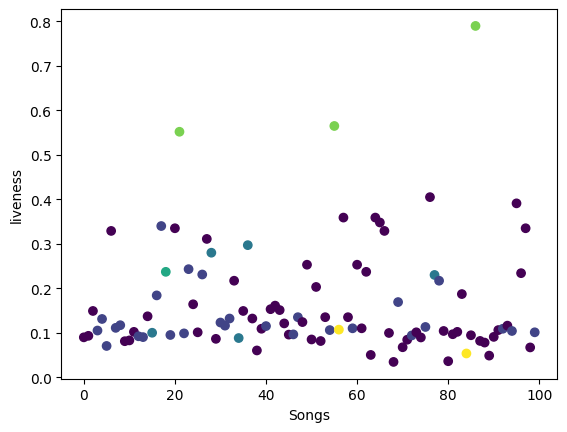

In [13]:
plt.scatter(df_final.index, df_final['liveness'], c=df_final['Cluster'], cmap='viridis')
plt.xlabel('Songs')
plt.ylabel('liveness')
plt.show()

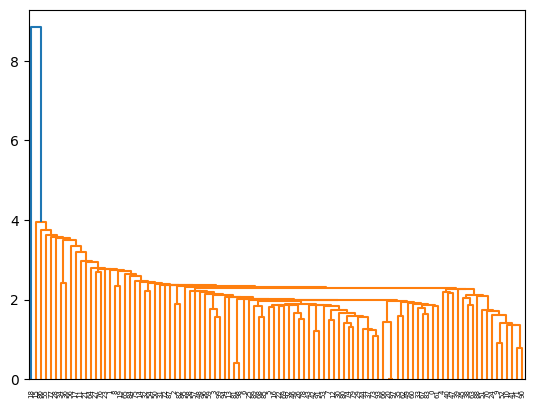

In [14]:
dendrogram(single_clustering)
plt.show()

<AxesSubplot: xlabel='Cluster', ylabel='energy'>

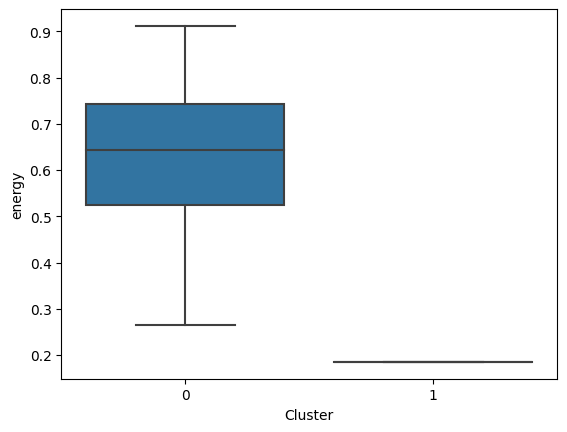

In [15]:
cluster_labels = cut_tree(single_clustering, n_clusters=2).reshape(-1, )
df_final["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='energy', data=df_final)

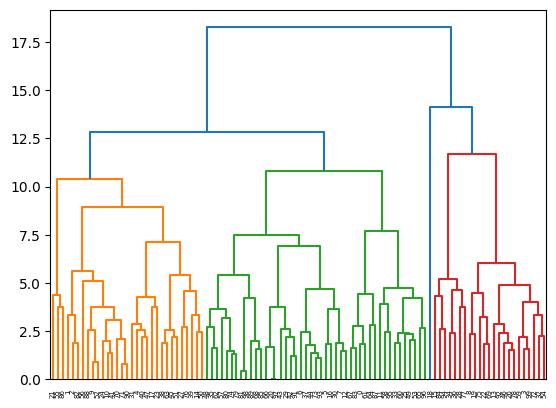

In [16]:
dendrogram(ward_clustering)
plt.show()

<AxesSubplot: xlabel='Cluster', ylabel='energy'>

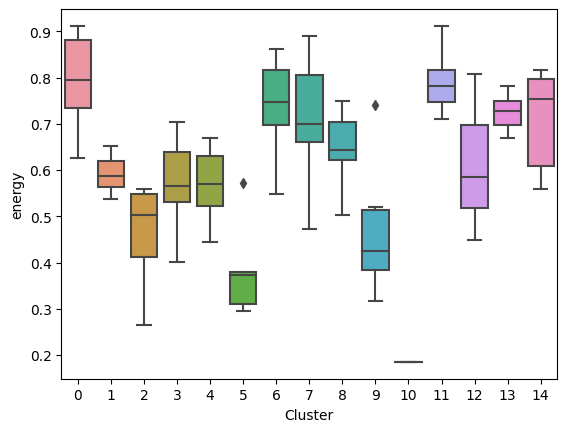

In [17]:
cluster_labels = cut_tree(ward_clustering, n_clusters=15).reshape(-1, )
df_final["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='energy', data=df_final)

In [18]:
df_final

,Song,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Cluster
0,Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,0
1,Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,1
2,Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,1
3,Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,2
4,Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,7
96,Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,7
97,Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,11
98,Despacito,0.797,2,-4.787,1,0.1530,0.19800,0.000000,0.0670,0.839,177.928,0.655,14


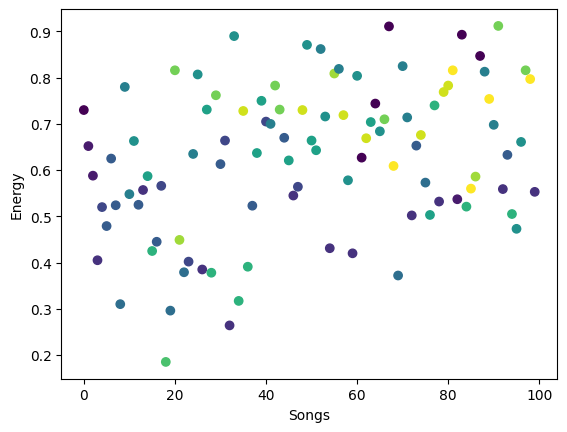

In [19]:
plt.scatter(df_final.index, df_final['energy'], c=df_final['Cluster'])
plt.xlabel('Songs')
plt.ylabel('Energy')
plt.show()